In [146]:
import numpy as np
import pandas as pd

In [147]:
df = pd.read_csv(r"C:\Users\admin\Desktop\CSV\Datasetn.csv")

In [148]:
df.head()

,observation_date,GOLDAMGBD228NLBM
0,01-04-1968,38.0
1,02-04-1968,37.6
2,03-04-1968,37.7
3,04-04-1968,36.7
4,05-04-1968,37.2


In [149]:
df.dropna()

,observation_date,GOLDAMGBD228NLBM
0,01-04-1968,38.00
1,02-04-1968,37.60
2,03-04-1968,37.70
3,04-04-1968,36.70
4,05-04-1968,37.20
...,...,...
13903,15-07-2021,1832.00
13904,16-07-2021,1822.00
13905,19-07-2021,1803.25
13906,20-07-2021,1815.30


In [150]:
import matplotlib.pyplot as plt

<AxesSubplot:>

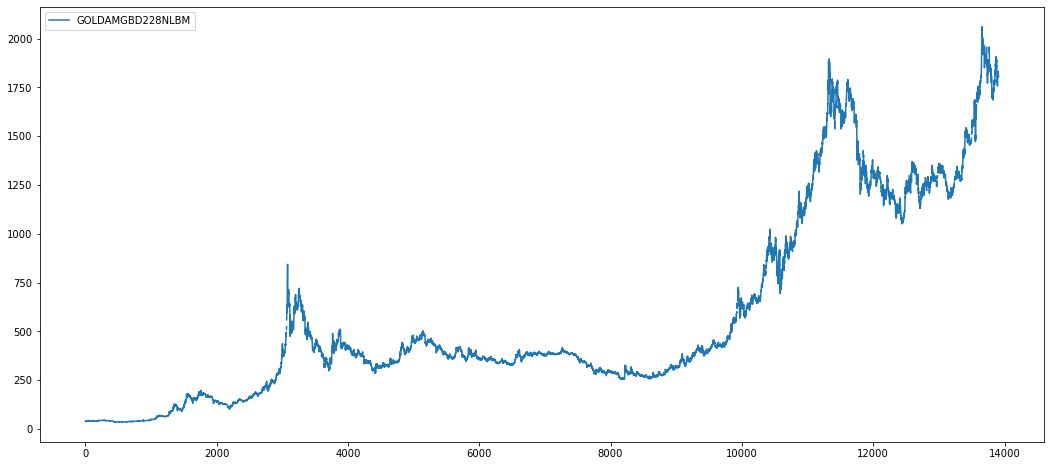

In [151]:
df.plot()

In [152]:
df["observation_date"]= pd.to_datetime(df["observation_date"])
indexdata=df.set_index(["observation_date"])

In [153]:
from datetime import datetime

In [154]:
indexdata

,GOLDAMGBD228NLBM
observation_date,
1968-01-04,38.00
1968-02-04,37.60
1968-03-04,37.70
1968-04-04,36.70
1968-05-04,37.20
...,...
2021-07-15,1832.00
2021-07-16,1822.00
2021-07-19,1803.25


<AxesSubplot:xlabel='observation_date'>

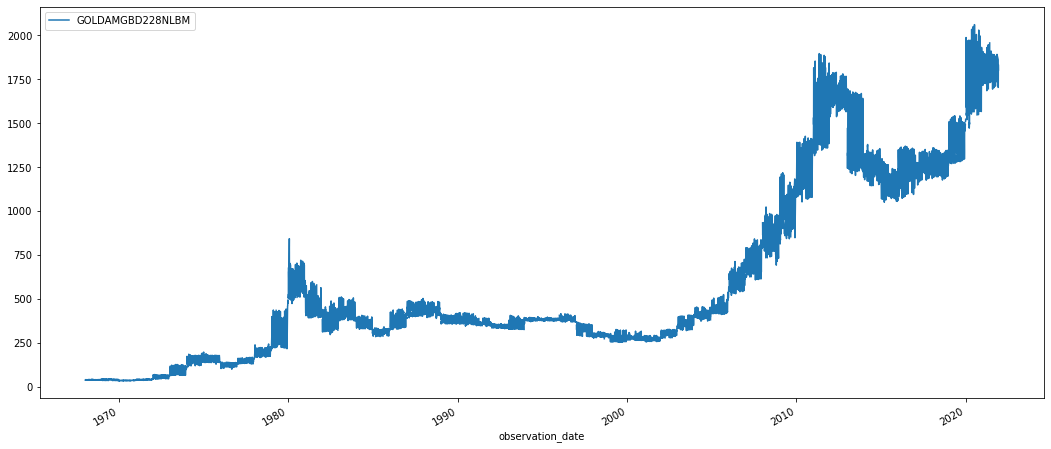

In [155]:
indexdata.plot()

In [156]:
resample = indexdata.resample('M') #M for monthly basis
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

,GOLDAMGBD228NLBM
observation_date,
1968-01-31,39.216667
1968-02-29,39.116667
1968-03-31,39.554167
1968-04-30,38.790278
1968-05-31,40.828409
...,...
2021-08-31,1807.233333
2021-09-30,1798.240000
2021-10-31,1817.775000


In [157]:
quarterly_mean_sales.head(20)

,GOLDAMGBD228NLBM
observation_date,
1968-01-31,39.216667
1968-02-29,39.116667
1968-03-31,39.554167
1968-04-30,38.790278
1968-05-31,40.828409
1968-06-30,40.608333
1968-07-31,39.045833
1968-08-31,39.360000
1968-09-30,40.000000


<AxesSubplot:xlabel='observation_date'>

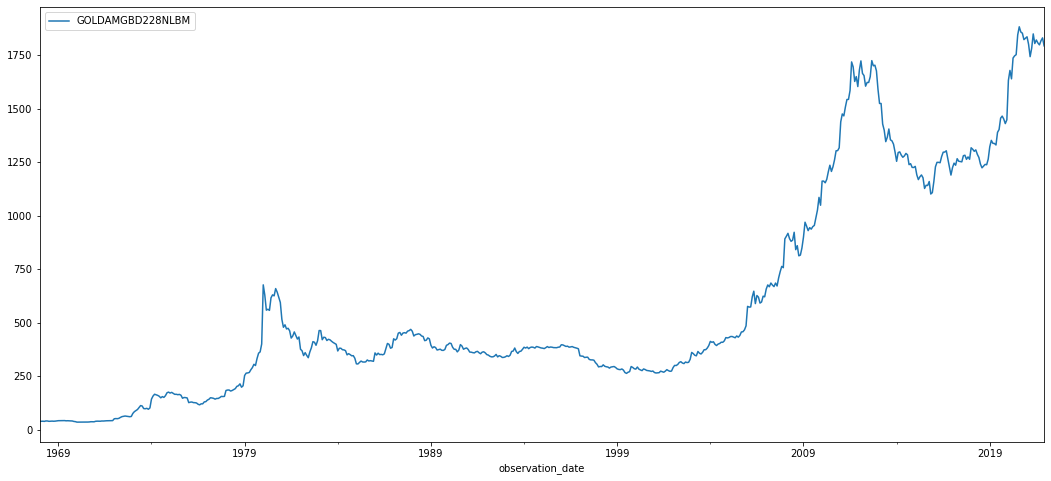

In [158]:
quarterly_mean_sales.plot()

array([[<AxesSubplot:title={'center':'GOLDAMGBD228NLBM'}>]], dtype=object)

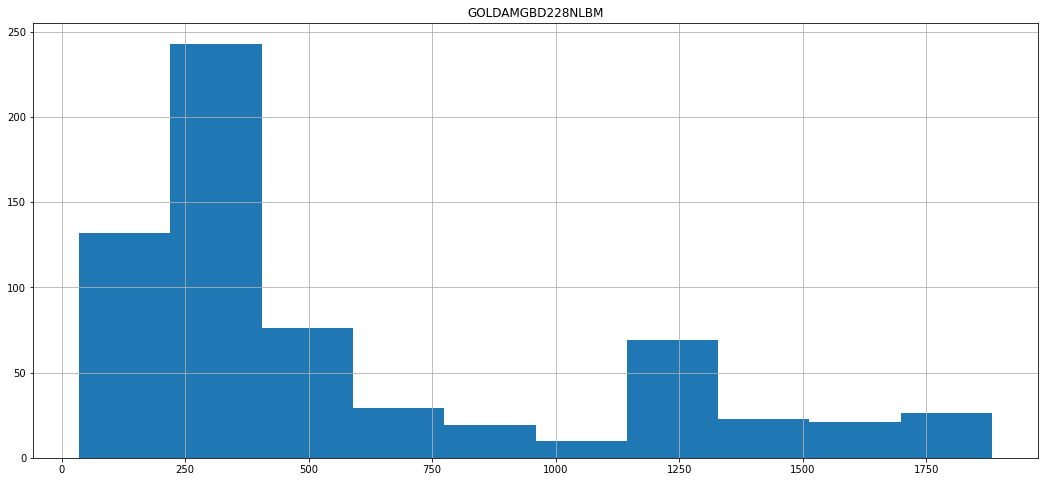

In [159]:
quarterly_mean_sales.hist()

<AxesSubplot:ylabel='Density'>

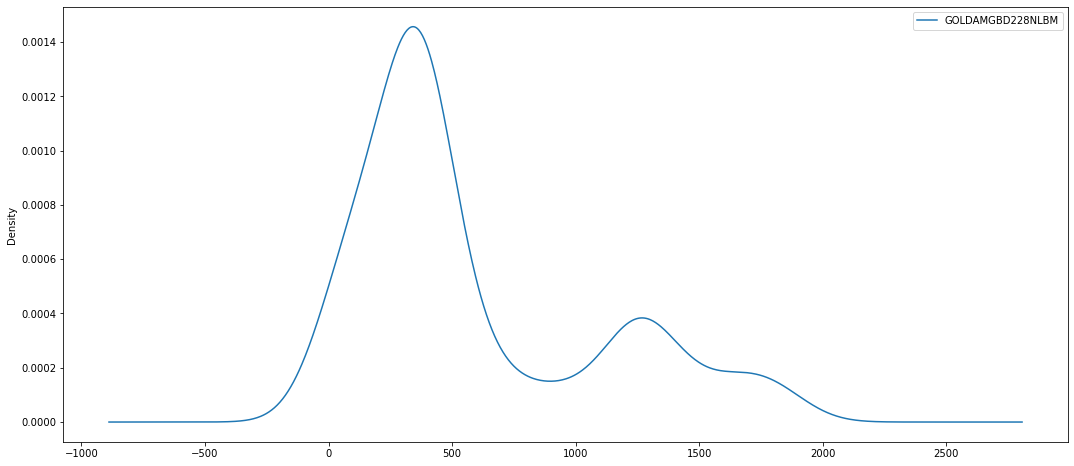

In [160]:
quarterly_mean_sales.plot(kind='kde')

<AxesSubplot:>

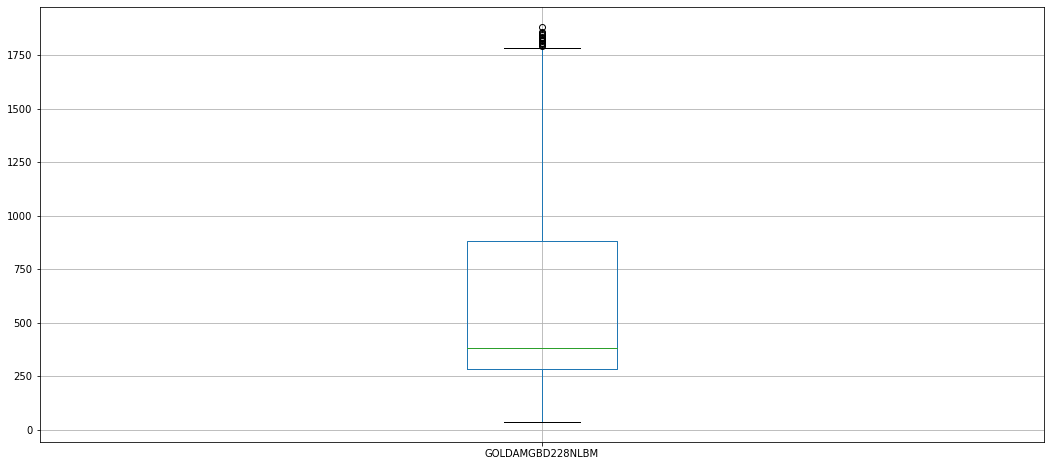

In [161]:
quarterly_mean_sales.boxplot()

In [162]:
from pandas import Grouper
from pandas import DataFrame

In [163]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

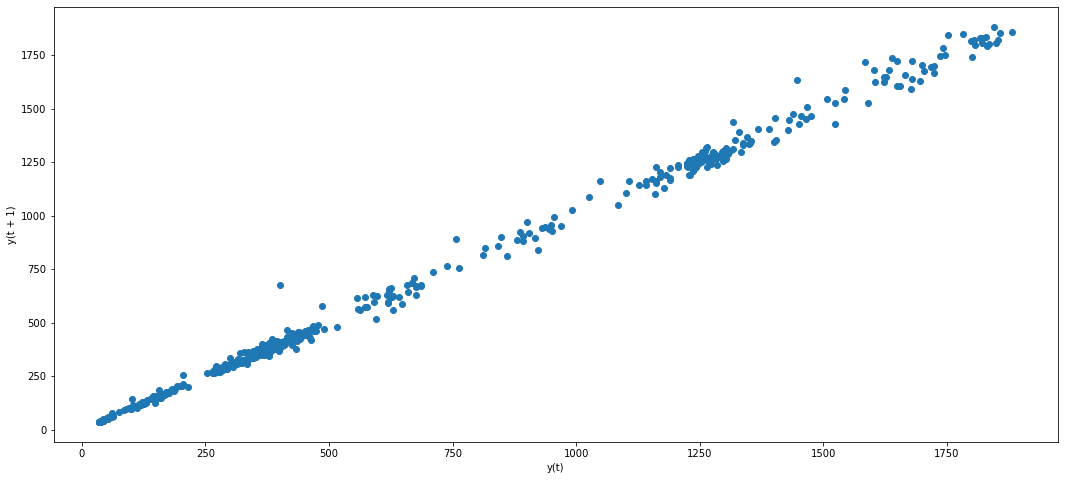

In [164]:
lag_plot(quarterly_mean_sales)

In [165]:
from statsmodels.graphics.tsaplots import plot_acf

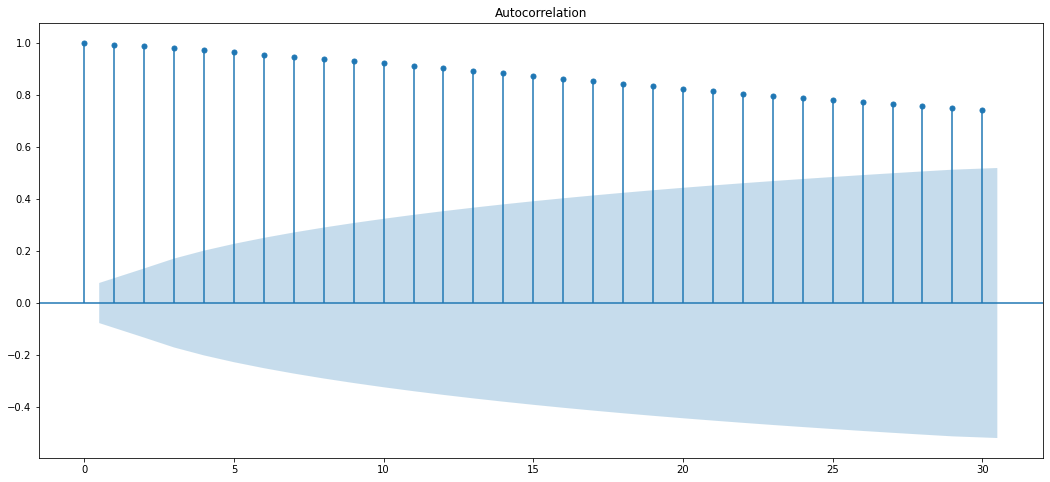

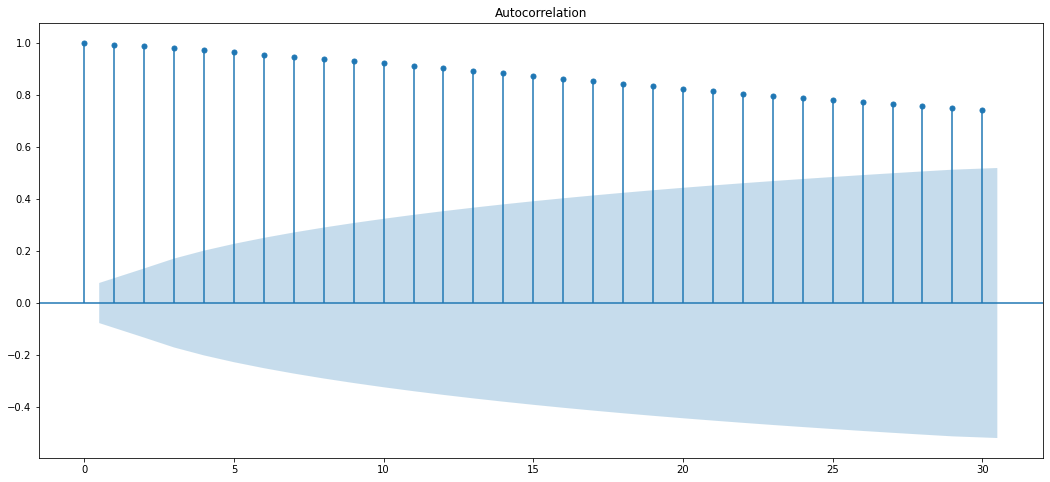

In [166]:
plot_acf(quarterly_mean_sales,lags=30)

In [167]:
#Checking for stationality
#dickey fuller test

In [168]:
from statsmodels.tsa.stattools import adfuller

In [169]:
test_result=adfuller(quarterly_mean_sales['GOLDAMGBD228NLBM'])

In [170]:
def adfuller_test(GOLDAMGBD228NLBM):
    result=adfuller(GOLDAMGBD228NLBM)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [171]:
adfuller_test(quarterly_mean_sales['GOLDAMGBD228NLBM'])

ADF Test Statistic : -0.3901771380259792
p-value : 0.9117259700419797
#Lags Used : 12
Number of Observations Used : 635
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [172]:
#Differencing

In [173]:
quarterly_mean_sales['GOLDAMGBD228NLBM'] = quarterly_mean_sales['GOLDAMGBD228NLBM'] - quarterly_mean_sales['GOLDAMGBD228NLBM'].shift(1)

In [174]:
quarterly_mean_sales['GOLDAMGBD228NLBM'].shift(1)

observation_date
1968-01-31          NaN
1968-02-29          NaN
1968-03-31    -0.100000
1968-04-30     0.437500
1968-05-31    -0.763889
                ...    
2021-08-31    16.420588
2021-09-30   -13.866667
2021-10-31    -8.993333
2021-11-30    19.535000
2021-12-31    13.215000
Freq: M, Name: GOLDAMGBD228NLBM, Length: 648, dtype: float64

In [175]:
quarterly_mean_sales['GOLDAMGBD228NLBM']=quarterly_mean_sales['GOLDAMGBD228NLBM']-quarterly_mean_sales['GOLDAMGBD228NLBM'].shift(12)


In [176]:
quarterly_mean_sales.head(20)


,GOLDAMGBD228NLBM
observation_date,
1968-01-31,NaN
1968-02-29,NaN
1968-03-31,NaN
1968-04-30,NaN
1968-05-31,NaN
1968-06-30,NaN
1968-07-31,NaN
1968-08-31,NaN
1968-09-30,NaN


In [177]:
quarterly_mean_sales.drop(['First Difference'],axis=1,inplace= True)

KeyError: "['First Difference'] not found in axis"

In [178]:
quarterly_mean_sales

,GOLDAMGBD228NLBM
observation_date,
1968-01-31,NaN
1968-02-29,NaN
1968-03-31,NaN
1968-04-30,NaN
1968-05-31,NaN
...,...
2021-08-31,-51.904081
2021-09-30,15.400207
2021-10-31,25.048439


In [179]:
## retest again dickey fuller test
adfuller_test(quarterly_mean_sales['GOLDAMGBD228NLBM'].dropna())

ADF Test Statistic : -7.582599117466465
p-value : 2.657485499259135e-11
#Lags Used : 14
Number of Observations Used : 620
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='observation_date'>

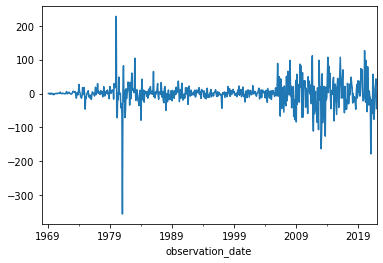

In [42]:
quarterly_mean_sales['GOLDAMGBD228NLBM'].plot()

array([[<AxesSubplot:title={'center':'GOLDAMGBD228NLBM'}>]], dtype=object)

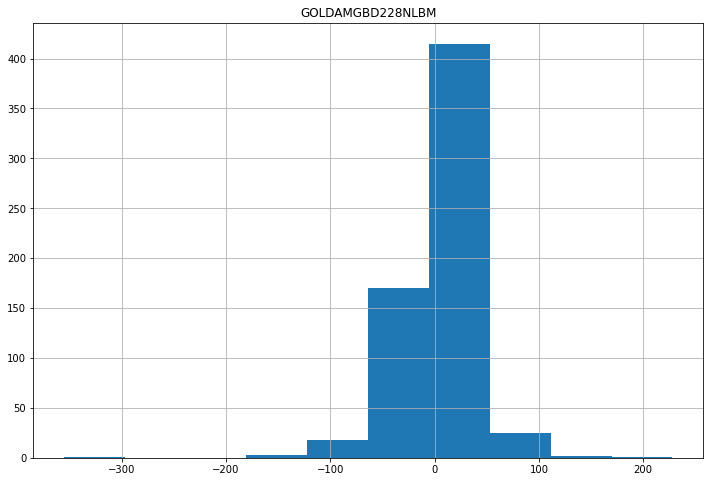

In [43]:
quarterly_mean_sales.hist(figsize=(12,8))

<AxesSubplot:ylabel='Density'>

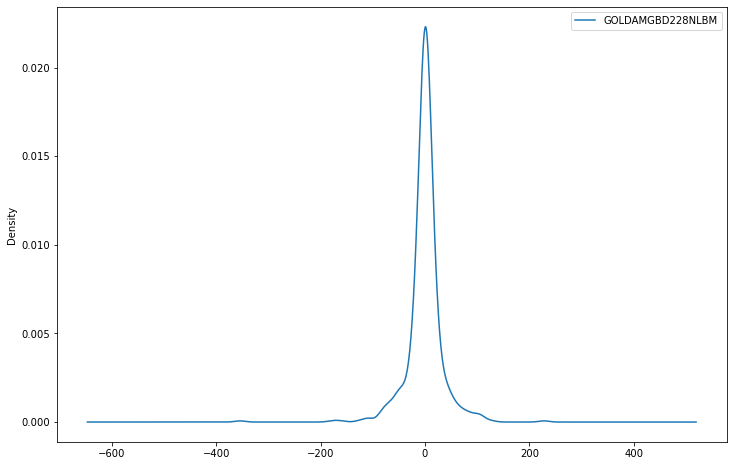

In [44]:
quarterly_mean_sales.plot(kind='kde',figsize=(12,8))

array([[<AxesSubplot:title={'center':'GOLDAMGBD228NLBM'}>]], dtype=object)

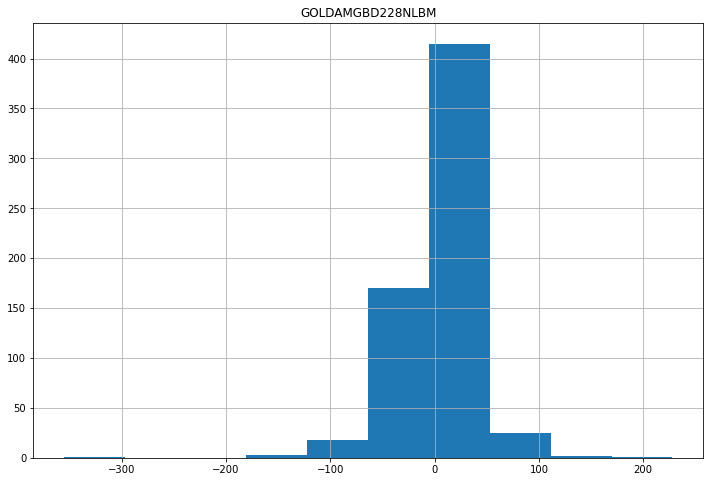

In [45]:
quarterly_mean_sales.hist('GOLDAMGBD228NLBM',figsize=(12,8))

<AxesSubplot:>

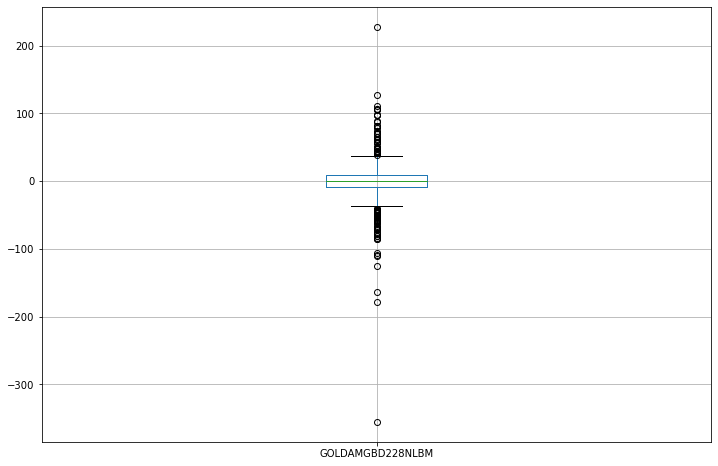

In [46]:
quarterly_mean_sales.boxplot(figsize=(12,8))

In [47]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

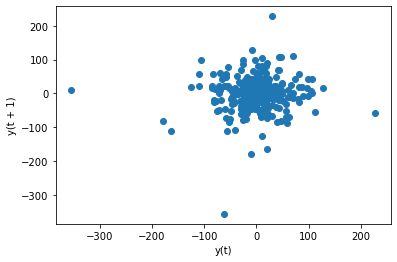

In [48]:
lag_plot(quarterly_mean_sales)

In [49]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [50]:
import statsmodels.api as sm

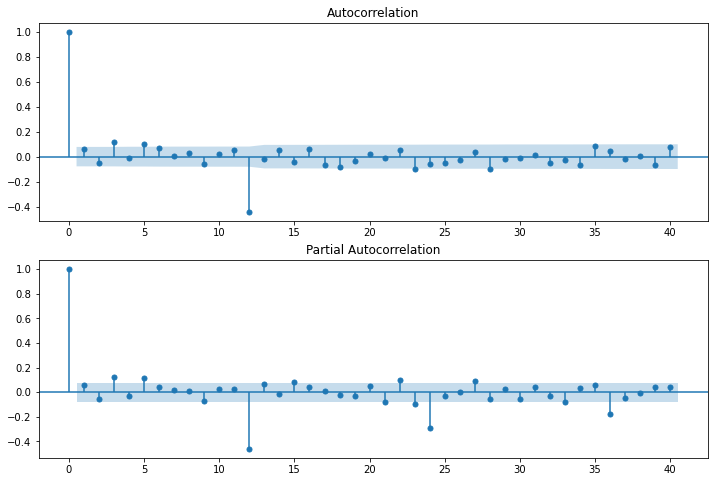

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(quarterly_mean_sales['GOLDAMGBD228NLBM'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(quarterly_mean_sales['GOLDAMGBD228NLBM'].iloc[13:],lags=40,ax=ax2)

In [53]:
quarterly_mean_sales

,GOLDAMGBD228NLBM
observation_date,
1968-01-31,NaN
1968-02-29,NaN
1968-03-31,NaN
1968-04-30,NaN
1968-05-31,NaN
...,...
2021-08-31,-51.904081
2021-09-30,15.400207
2021-10-31,25.048439


In [197]:
#month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [198]:
#month=pd.DataFrame(month)

In [199]:
#months=pd.DataFrame(np.tile(month,(8,1)))

In [200]:
#quarterly_mean_sales=pd.concat([quarterly_mean_sales,months])

In [54]:
quarterly_mean_sales['t']=np.arange(1,649)
quarterly_mean_sales['t_sq']=quarterly_mean_sales['t']*quarterly_mean_sales['t']
quarterly_mean_sales['log_gold']=np.log(quarterly_mean_sales['GOLDAMGBD228NLBM'])

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
quarterly_mean_sales

,GOLDAMGBD228NLBM,t,t_sq,log_gold
observation_date,,,,
1968-01-31,NaN,1,1,NaN
1968-02-29,NaN,2,4,NaN
1968-03-31,NaN,3,9,NaN
1968-04-30,NaN,4,16,NaN
1968-05-31,NaN,5,25,NaN
...,...,...,...,...
2021-08-31,-51.904081,644,414736,NaN
2021-09-30,15.400207,645,416025,2.734381
2021-10-31,25.048439,646,417316,3.220811


In [56]:
Train=quarterly_mean_sales[0:453]
Test=quarterly_mean_sales[453:648]

In [57]:
Test.set_index(np.arange(1,196),inplace=True)

In [58]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('GOLDAMGBD228NLBM~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['GOLDAMGBD228NLBM'])-np.array(pred_linear))**2))
rmse_linear

49.287914618710225

In [59]:
#Exponential

Exp = smf.ols('log_gold~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['GOLDAMGBD228NLBM'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

50.12827153713681

In [60]:
#Quadratic 

Quad = smf.ols('GOLDAMGBD228NLBM~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['GOLDAMGBD228NLBM'])-np.array(pred_Quad))**2))
rmse_Quad

49.39360024119203

In [208]:
#Additive seasonality 

#add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
#pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
#rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
#rmse_add_sea

In [61]:
df = quarterly_mean_sales.iloc[:,0:1]
df

,GOLDAMGBD228NLBM
observation_date,
1968-01-31,NaN
1968-02-29,NaN
1968-03-31,NaN
1968-04-30,NaN
1968-05-31,NaN
...,...
2021-08-31,-51.904081
2021-09-30,15.400207
2021-10-31,25.048439


In [64]:
import warnings

In [65]:
warnings.filterwarnings("ignore")

In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [67]:
model=ARIMA(df['GOLDAMGBD228NLBM'].dropna(),order=(1,1,1))
model_fit=model.fit()

In [68]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.GOLDAMGBD228NLBM   No. Observations:                  634
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3151.754
Method:                       css-mle   S.D. of innovations             34.719
Date:                Sat, 11 Sep 2021   AIC                           6311.508
Time:                        12:17:29   BIC                           6329.317
Sample:                    03-31-1969   HQIC                          6318.424
                         - 12-31-2021                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0015      0.008     -0.192      0.848      -0.017       0.014
ar.L1.D.GOLDAMGBD228NLBM     0.0608      0.040      1.531      0.126      -0.017       0.139
ma.L1.D.GOLDAMGBD228NLBM    -1.0000      0.004   -244.553      0.000      -1.008      -0.992
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           16.4536           +0.0000j           16.4536            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='observation_date'>

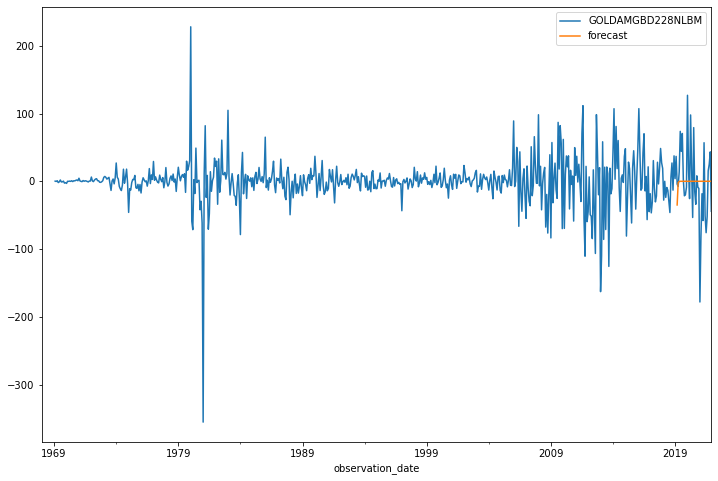

In [70]:
df['forecast']=model_fit.predict(start=601,end=650,dynamic=True)
df[['GOLDAMGBD228NLBM','forecast']].plot(figsize=(12,8))

In [71]:
import statsmodels.api as sm

In [80]:
model=sm.tsa.statespace.SARIMAX(df['GOLDAMGBD228NLBM'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:xlabel='observation_date'>

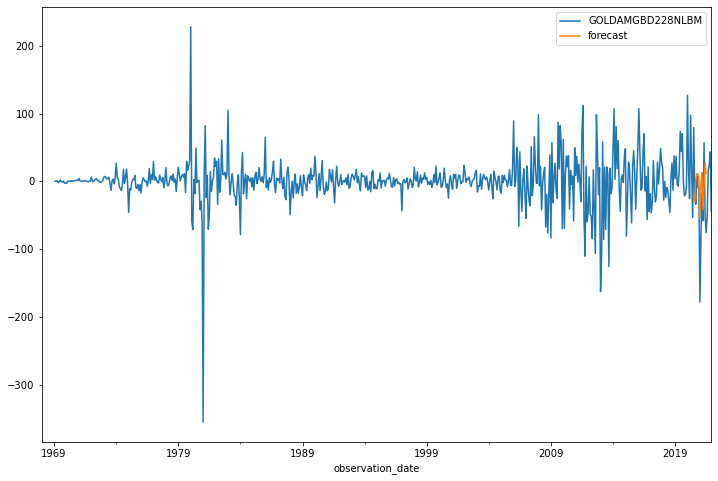

In [81]:
df['forecast']=results.predict(start=630,end=642,dynamic=True)
df[['GOLDAMGBD228NLBM','forecast']].plot(figsize=(12,8))

In [85]:
df.head(20)

,GOLDAMGBD228NLBM,forecast
observation_date,,
1968-01-31,NaN,NaN
1968-02-29,NaN,NaN
1968-03-31,NaN,NaN
1968-04-30,NaN,NaN
1968-05-31,NaN,NaN
1968-06-30,NaN,NaN
1968-07-31,NaN,NaN
1968-08-31,NaN,NaN
1968-09-30,NaN,NaN


In [83]:
df.forecast

observation_date
1968-01-31   NaN
1968-02-29   NaN
1968-03-31   NaN
1968-04-30   NaN
1968-05-31   NaN
              ..
2021-08-31   NaN
2021-09-30   NaN
2021-10-31   NaN
2021-11-30   NaN
2021-12-31   NaN
Freq: M, Name: forecast, Length: 648, dtype: float64

In [86]:
df4 = df.iloc[:,0:1].dropna()
df4

,GOLDAMGBD228NLBM
observation_date,
1969-02-28,0.242179
1969-03-31,-0.256946
1969-04-30,0.812823
1969-05-31,-1.906941
1969-06-30,-0.810103
...,...
2021-08-31,-51.904081
2021-09-30,15.400207
2021-10-31,25.048439


In [87]:
# separating a validation dataset
split_point = len(df4) - 30
dataset, validation = df4[0:split_point], df4[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 605, Validation 30


In [88]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [89]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=7.813, Expected=-12.921
>Predicted=-12.921, Expected=-12.121
>Predicted=-12.121, Expected=0.086
>Predicted=0.086, Expected=-15.392
>Predicted=-15.392, Expected=13.285
>Predicted=13.285, Expected=15.661
>Predicted=15.661, Expected=-10.717
>Predicted=-10.717, Expected=-4.221
>Predicted=-4.221, Expected=-11.016
>Predicted=-11.016, Expected=-10.675
>Predicted=-10.675, Expected=1.901
>Predicted=1.901, Expected=-0.099
>Predicted=-0.099, Expected=12.294
>Predicted=12.294, Expected=-9.970
>Predicted=-9.970, Expected=0.318
>Predicted=0.318, Expected=0.500
>Predicted=0.500, Expected=1.553
>Predicted=1.553, Expected=-7.299
>Predicted=-7.299, Expected=1.433
>Predicted=1.433, Expected=4.901
>Predicted=4.901, Expected=3.255
>Predicted=3.255, Expected=11.495
>Predicted=11.495, Expected=1.186
>Predicted=1.186, Expected=-7.698
>Predicted=-7.698, Expected=-8.694
>Predicted=-8.694, Expected=5.513
>Predicted=5.513, Expected=-6.908
>Predicted=-6.908, Expected=1.894
>Predicted=1.894, Expected=3.6

In [90]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [91]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [92]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=35.447
ARIMA(0, 0, 1) RMSE=35.690
ARIMA(0, 0, 2) RMSE=35.939
ARIMA(0, 0, 3) RMSE=35.711
ARIMA(0, 0, 4) RMSE=35.821
ARIMA(0, 1, 0) RMSE=50.029
ARIMA(0, 1, 1) RMSE=35.549
ARIMA(0, 1, 2) RMSE=35.795
ARIMA(0, 1, 3) RMSE=36.038
ARIMA(0, 1, 4) RMSE=35.808
ARIMA(0, 2, 0) RMSE=86.402
ARIMA(0, 2, 1) RMSE=50.128
ARIMA(0, 2, 2) RMSE=35.719
ARIMA(0, 2, 3) RMSE=35.971
ARIMA(0, 2, 4) RMSE=36.255
ARIMA(1, 0, 0) RMSE=35.623
ARIMA(1, 0, 1) RMSE=35.244
ARIMA(1, 0, 2) RMSE=35.389
ARIMA(1, 0, 3) RMSE=35.674
ARIMA(1, 0, 4) RMSE=35.537
ARIMA(1, 1, 0) RMSE=43.752
ARIMA(1, 1, 1) RMSE=35.727
ARIMA(1, 1, 3) RMSE=35.461
ARIMA(1, 2, 0) RMSE=66.623
ARIMA(2, 0, 0) RMSE=35.845
ARIMA(2, 0, 1) RMSE=35.376
ARIMA(2, 1, 0) RMSE=40.038
ARIMA(2, 1, 1) RMSE=35.946
ARIMA(2, 1, 2) RMSE=35.456
ARIMA(2, 1, 3) RMSE=34.880
ARIMA(2, 1, 4) RMSE=34.553
ARIMA(2, 2, 0) RMSE=55.222
ARIMA(3, 0, 0) RMSE=35.702
ARIMA(3, 0, 1) RMSE=35.596
ARIMA(3, 1, 0) RMSE=39.148
ARIMA(3, 1, 1) RMSE=35.800
ARIMA(3, 1, 2) RMSE=35.594
A

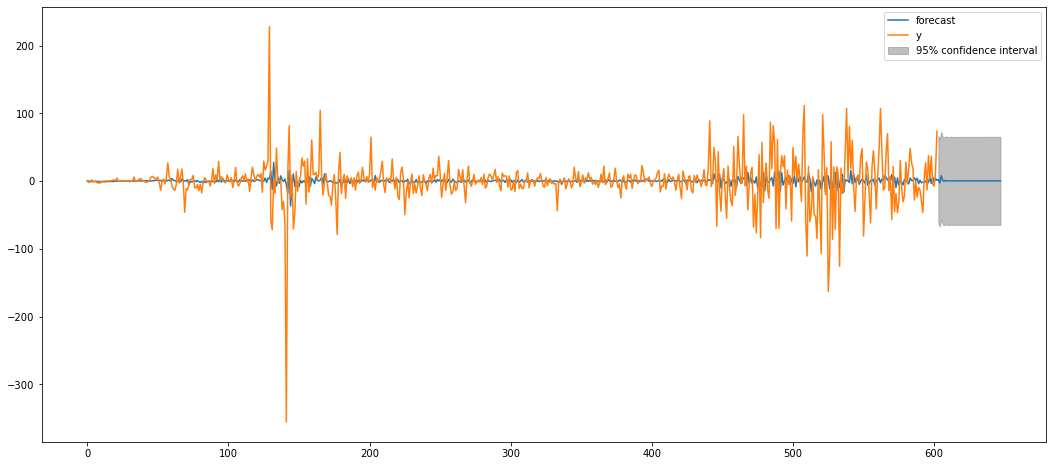

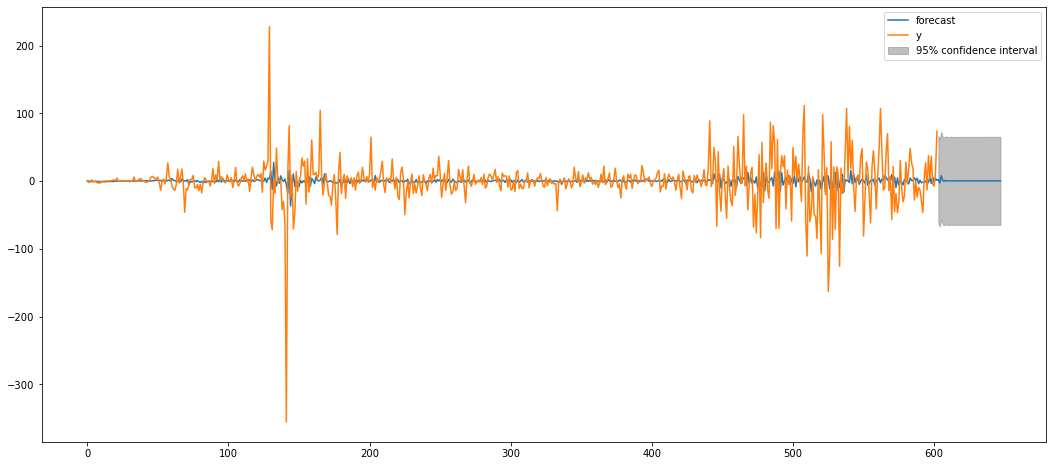

In [140]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(3,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1, 648)

In [186]:
forecast

array([ 2.32321953, -2.72814357,  8.267723  ,  1.26348728, -0.35682524,
        1.23522876,  0.64742371,  0.33675469,  0.53669273,  0.50311   ,
        0.45527221,  0.47834284,  0.48006529,  0.47453254,  0.47786315,
        0.47974815,  0.48018238,  0.48161784,  0.48303783,  0.48423156,
        0.48552566,  0.48683777,  0.48811925,  0.48940911,  0.49070338,
        0.49199394,  0.49328495,  0.49457672,  0.49586808,  0.49715942])

In [110]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

59.77592740402349

In [111]:
new = pd.read_csv(r"C:\Users\admin\Desktop\CSV\Datasetn.csv")

In [112]:
new

,observation_date,GOLDAMGBD228NLBM
0,01-04-1968,38.00
1,02-04-1968,37.60
2,03-04-1968,37.70
3,04-04-1968,36.70
4,05-04-1968,37.20
...,...,...
13903,15-07-2021,1832.00
13904,16-07-2021,1822.00
13905,19-07-2021,1803.25
13906,20-07-2021,1815.30


In [121]:
new['observation_date']= pd.to_datetime(new['observation_date'])
new=new.set_index(['observation_date'])

In [125]:
# fit model
df1=new.dropna()
#df= newdf.set_index('observation_date').dropna()

# prepare data
X = df1.values
X = X.astype('float32')

In [128]:
model = ARIMA(X, order=(3,1,1))
model_fit = model.fit()

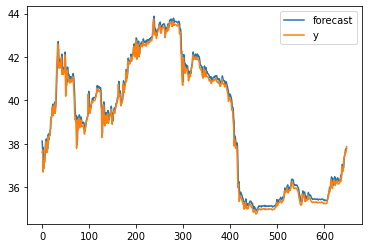

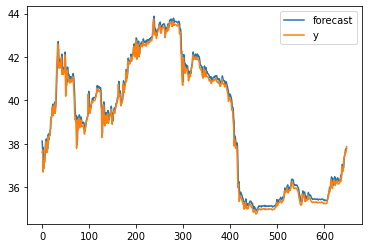

In [137]:
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1, 648)

In [138]:
forecast

array([1806.12825453, 1806.33452303, 1806.52380206, 1806.69993805,
       1806.8659066 , 1807.02400964, 1807.17602793, 1807.32333906,
       1807.46700875, 1807.60786142, 1807.74653484, 1807.8835224 ,
       1808.01920579, 1808.15388026, 1808.28777425, 1808.42106444,
       1808.55388755, 1808.68634932, 1808.81853155, 1808.95049754,
       1809.08229624, 1809.21396553, 1809.34553471, 1809.47702644,
       1809.60845825, 1809.73984372, 1809.87119333, 1810.0025152 ,
       1810.13381561, 1810.26509943])

In [131]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                13476
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -48267.157
Method:                       css-mle   S.D. of innovations              8.695
Date:                Sat, 11 Sep 2021   AIC                          96542.314
Time:                        15:57:52   BIC                          96572.349
Sample:                             1   HQIC                         96552.332
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1312      0.069      1.889      0.059      -0.005       0.267
ar.L1.D.y      0.7736      0.106      7.301      0.000       0.566       0.981
ma.L1.D.y     -0.7900      0.102     -7.710      0.000      -0.991      -0.589
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2927           +0.0000j            1.2927            0.0000
MA.1            1.2658           +0.0000j            1.2658            0.0000
-----------------------------------------------------------------------------
"""